# Examples for (upcoming) 1.3 lolviz

## Install
If on mac, I had to do this:

```bash
$ brew install graphviz  # had to upgrade graphviz on el capitan
```

Then

```bash
$ pip install lolviz
```

## Sample visualizations

In [1]:
from lolviz import objviz, listviz, lolviz, callviz, callsviz, treeviz, strviz

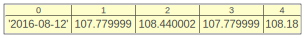

In [2]:
objviz(['2016-08-12',107.779999,108.440002,107.779999,108.18])

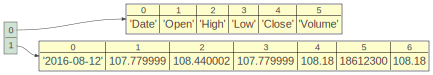

In [3]:
table = [
    ['Date','Open','High','Low','Close','Volume'],
    ['2016-08-12',107.779999,108.440002,107.779999,108.18,18612300,108.18],
]
objviz(table)

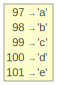

In [4]:
d = dict([(c,chr(c)) for c in range(ord('a'),ord('f'))])
objviz(d)

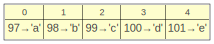

In [5]:
tuplelist = d.items()
listviz(tuplelist)

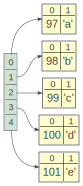

In [6]:
objviz(tuplelist)

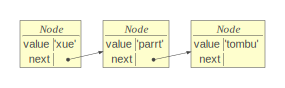

In [7]:
# test linked list node
class Node:
    def __init__(self, value, next=None):
        self.value = value
        self.next = next

head = Node('tombu')
head = Node('parrt', head)
head = Node("xue", head)
objviz(head)

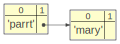

In [8]:
head2 = ('parrt',('mary',None))
objviz(head2)

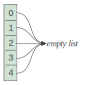

In [9]:
data = [[]] * 5  # INCORRECT list of list init
lolviz(data)

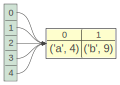

In [10]:
data[0].append( ('a',4) )
data[2].append( ('b',9) ) # whoops! should be different list object
lolviz(data)

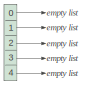

In [11]:
table = [ [] for i in range(5) ] # correct way to init
lolviz(table)

hashcode = 97
bucket_index = 2


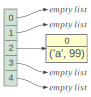

In [12]:
key = 'a'
value = 99
def hashcode(o): return ord(o) # assume keys are single-element strings
print "hashcode =", hashcode(key)
bucket_index = hashcode(key) % len(table)
print "bucket_index =", bucket_index
bucket = table[bucket_index]
bucket.append( (key,value) ) # add association to the bucket
lolviz(table)

hashcode = 102
bucket_index = 2


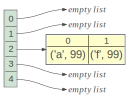

In [13]:
key = 'f'
value = 99
print "hashcode =", hashcode(key)
bucket_index = hashcode(key) % len(table)
print "bucket_index =", bucket_index
bucket = table[bucket_index]
bucket.append( (key,value) ) # add association to the bucket
lolviz(table)

If we don't indicate we want a simple 2-level list of list with `lolviz()`, we get a generic object graph:

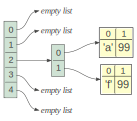

In [14]:
objviz(table)

4406382464 4406382464


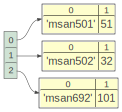

In [15]:
courses = [
    ['msan501', 51],
    ['msan502', 32],
    ['msan692', 101]
]
mycourses = courses
print id(mycourses), id(courses)
objviz(courses)

You can also display strings as arrays in isolation (but not in other data structures as I figured it's not that useful in most cases):

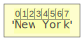

In [16]:
strviz('New York')

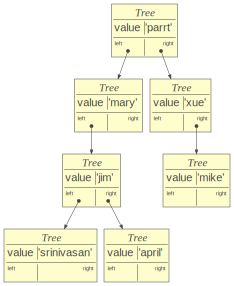

In [17]:
class Tree:
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right
        
root = Tree('parrt',
            Tree('mary',
                 Tree('jim',
                      Tree('srinivasan'),
                      Tree('april'))),
            Tree('xue',None,Tree('mike')))

treeviz(root)

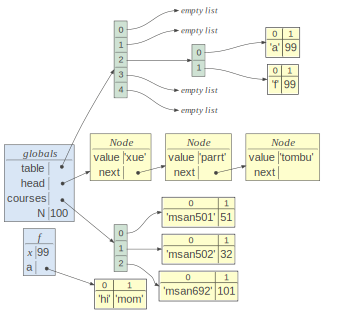

In [20]:
from IPython.display import display

N = 100

def f(x):
    a = ['hi','mom']
    thestack = callsviz(varnames=['table','x','head','courses','N','a'])
    display(thestack)
    
f(99)

If you'd like to save an image from jupyter, use `render()`:

In [19]:
def f(x):
    thestack = callsviz(varnames=['table','x','tree','head','courses'])
    print thestack.source[:100]  # show first 100 char of graphviz syntax
    thestack.render("/tmp/t") # save as PDF
    
f(99)


    digraph G {
        nodesep=.1;
        ranksep=.1;
        rankdir=LR;
        node [penwidth=
